# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [29]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [24]:
# Your code here
boston = datasets.load_boston()
df = pd.DataFrame(boston.data)
df.columns=boston.feature_names
df['MEDV']= boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
def outliers_iqr(data):
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_out

In [26]:
def outliers_z(data):
    z = np.abs(stats.zscore(data))
    data_out = data[(z < 3).all(axis=1)]
    return data_out

In [27]:
df_o = outliers_z(df)
df_o.shape

(415, 14)

In [28]:
df_o.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

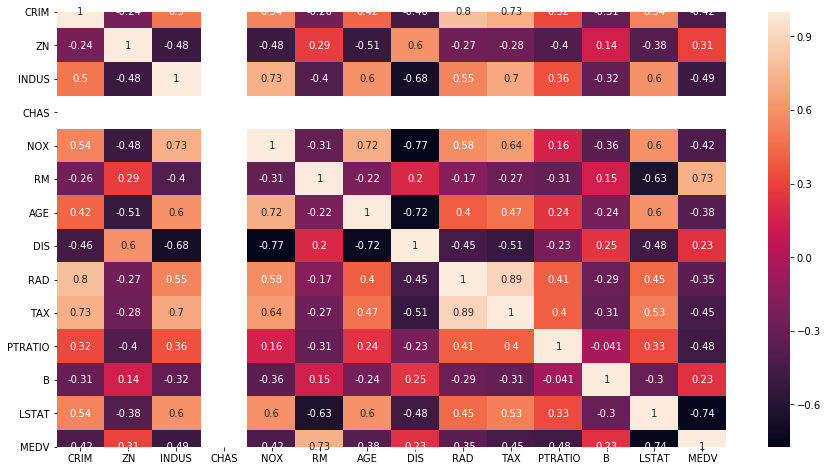

In [37]:
# Your plots here
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.heatmap(df_o.corr(), annot=True)


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# Your response here

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [33]:
# Your code here
df_o['MEDV'].describe()

count    415.000000
mean      22.353976
std        8.077366
min        5.600000
25%       17.550000
50%       21.200000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [126]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = r2_score(y_true, y_predict)
    return result

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [34]:
# Your code here
X = df_o.drop(columns=['MEDV'], axis=1)
y = df_o['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 29)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [106]:
# Five separate RFR here with the given max depths
regr1 = RandomForestRegressor(max_depth=1, random_state=0)
regr2 = RandomForestRegressor(max_depth=2, random_state=0)
regr4 = RandomForestRegressor(max_depth=4, random_state=0)
regr6 = RandomForestRegressor(max_depth=6, random_state=0)
regr8 = RandomForestRegressor(max_depth=8, random_state=0)
regr10 = RandomForestRegressor(max_depth=10, random_state=0)
reg = [regr1,regr2,regr4,regr6,regr8,regr10]

Now, plot the score for each tree on the training set and on the testing set.

In [117]:
# Produce a plot with the score for the testing and training for the different max depths
test = []
train = []
k=[1,2,4,6,8,10]
for i in range(len(reg)):
    
    model = reg[i].fit(X_train, y_train)
    print(f'Max depth: {k[i]}  //  Score test: {reg[i].score(X_test, y_test)}  //  Score train: {reg[i].score(X_train, y_train)}')
    test.append(reg[i].score(X_test, y_test))
    train.append(reg[i].score(X_train, y_train))

Max depth: 1  //  Score test: 0.5863841836491234  //  Score train: 0.5194991056982567
Max depth: 2  //  Score test: 0.8075934414745998  //  Score train: 0.7469051040456764
Max depth: 4  //  Score test: 0.821345941610744  //  Score train: 0.8863540163597089
Max depth: 6  //  Score test: 0.835147664214445  //  Score train: 0.9291607426366819
Max depth: 8  //  Score test: 0.8265872800136115  //  Score train: 0.9462010132751645
Max depth: 10  //  Score test: 0.821555325608126  //  Score train: 0.9526837145370245


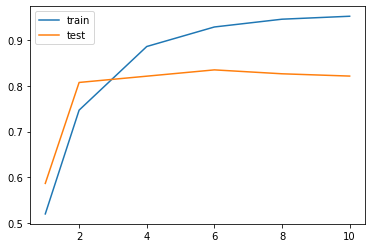

In [118]:
plt.plot(k,train,label='train')
plt.plot(k,test,label='test')
plt.legend()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [127]:
# Your response here
for r in range(len(reg)):
    y_pred = reg[r].predict(X_test)
    print(k[r], r2_score(y_test, y_pred))

1 0.5863841836491234
2 0.8075934414745998
4 0.821345941610744
6 0.835147664214445
8 0.8265872800136115
10 0.821555325608126


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here